Model 4

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model 4: quadratic factor

Investigating a non-linear relationship with overall quality

Starting with top 20 features

In [83]:
df = pd.read_csv('data/AmesHousingCleaned.csv')
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [84]:
feat_top_20 = df[numeric_columns].corr().nlargest(20, 'saleprice')['saleprice'].index
feat_top_20 = feat_top_20.drop('saleprice')
feat_top_20

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'bsmt_full_bath', '2nd_flr_sf', 'lot_area'],
      dtype='object')

In [85]:
X = df.loc[:,feat_top_20]
y = df['saleprice']

In [86]:
# get the mean of the saleprice for each quality level:
    # 1. go through each unique quality level in X_train : unq = list(X_train['overall_qual'].unique())
    # 2. return TF array of X_train values that equal that unique quality level : X_train['overall_qual'] == qual
    # 3. get the y_train values that match the positions (indices) of the matching unique quality levels by masking y_train (should be around 20 or so) : y_train[X_train['overall_qual'] == qual]
    # 4. get the mean of those saleprices and append to means : y_train[X_train['overall_qual'] == qual].mean()
    # 5. append to means list : means.append(y_train[X_train['overall_qual'] == qual].mean())

unq = list(X['overall_qual'].unique())
unq.sort()

means = []
for qual in unq:
    means.append(y[X['overall_qual'] == qual].mean())

means

[48725.0,
 52325.307692307695,
 83185.975,
 106485.09734513274,
 134752.51636363636,
 162130.31830601091,
 205025.7607973422,
 270913.59428571427,
 368336.7663551402,
 450217.32258064515]

In [87]:
# get the mean of the saleprice for each quality level:

pd.concat([X,y], axis=1).groupby('overall_qual').agg({'saleprice': 'mean'}).reset_index()

,overall_qual,saleprice
0,1,48725.000000
1,2,52325.307692
2,3,83185.975000
3,4,106485.097345
4,5,134752.516364
5,6,162130.318306
6,7,205025.760797
7,8,270913.594286
8,9,368336.766355
9,10,450217.322581


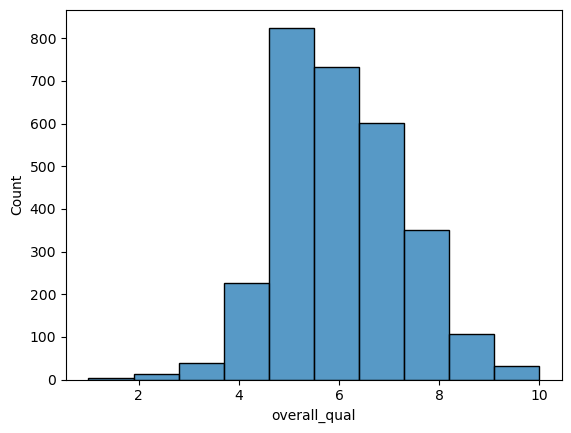

In [88]:
sns.histplot(X.overall_qual, bins=10)
plt.show()

In [89]:
X.columns

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'bsmt_full_bath', '2nd_flr_sf', 'lot_area'],
      dtype='object')

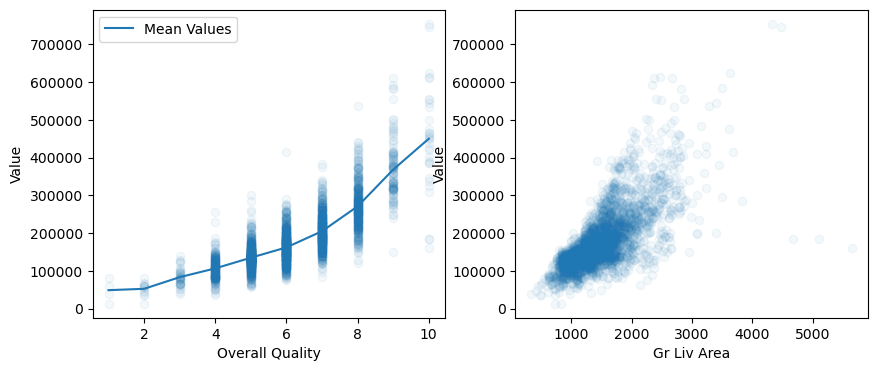

In [90]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X['overall_qual'],y, alpha = .05, label=None)
ax[0].plot(unq, means, label='Mean Values')
ax[0].set_xlabel('Overall Quality')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[1].scatter(X['gr_liv_area'],y, alpha = .05)
ax[1].set_xlabel('Gr Liv Area')
ax[1].set_ylabel('Value')
plt.show()

Let's try adding in `'Overall Qual'` *squared* as a predictor variable

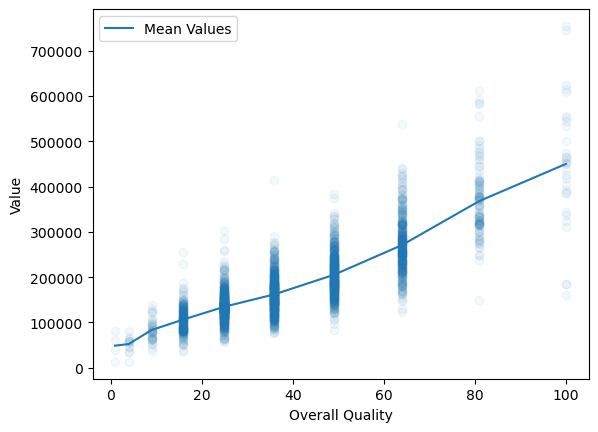

In [91]:
df['OQ2'] = df['overall_qual']**2
unq = list(df['OQ2'].unique())
unq.sort()
plt.scatter(df['OQ2'],y, alpha = .05, label=None)
plt.plot(unq, means, label='Mean Values')
plt.xlabel('Overall Quality')
plt.ylabel('Value')
plt.legend()
plt.show()

Select features and target

In [92]:
most_corr_columns = df[numeric_columns].corr().nlargest(10, 'saleprice')['saleprice'].index


In [93]:
selected_features_4 = list(most_corr_columns.drop('saleprice')) + ['OQ2']
X4 = df.loc[:,selected_features_4]
y4 = df['saleprice']

T-T split

In [94]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3,random_state=42)

Fit model

In [95]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train4,y_train4)

LinearRegression()

Model prediction

In [96]:
### Get the predictions on the training set
train_set_pred4 = lr_model4.predict(X_train4)

In [97]:
### Get the predictions on the test set
test_set_pred4 = lr_model4.predict(X_test4)

View residuals

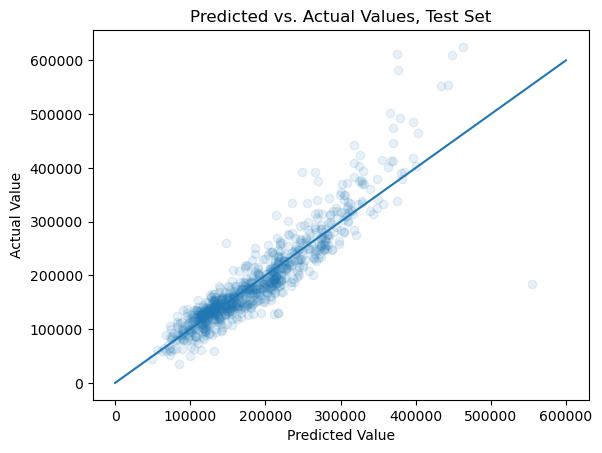

In [98]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred4, y_test4,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [99]:
# r2
lr_model4.score(X_test4, y_test4)

0.842039712093102

In [100]:
mae4 = mean_absolute_error(y_test4,test_set_pred4)
train_mae4 = mean_absolute_error(y_train4,train_set_pred4)
print(f"Train MAD: {train_mae4:.2f}")
print(f"Val MAD: {mae4:.2f}")

Train MAD: 21674.19
Val MAD: 21395.58


In [101]:
rmse4 = np.sqrt(mean_squared_error(y_test4,test_set_pred4))
train_rmse4 = np.sqrt(mean_squared_error(y_train4,train_set_pred4))
print(f"Train RMSE: {train_rmse4:.2f}")
print(f"Val RMSE: {rmse4:.2f}")

Train RMSE: 34055.26
Val RMSE: 33322.22


View features

In [102]:
list(zip(X_train4.columns,lr_model4.coef_))

[('overall_qual', -35823.84984829539),
 ('gr_liv_area', 50.40839866371891),
 ('garage_cars', 11217.037566079574),
 ('garage_area', 3.783343901663379),
 ('total_bsmt_sf', 20.302223648232147),
 ('1st_flr_sf', 5.185703684401865),
 ('year_built', 318.9251664714279),
 ('full_bath', -7181.181931610085),
 ('year_remod/add', 297.57478847352314),
 ('OQ2', 4570.553747238229)]

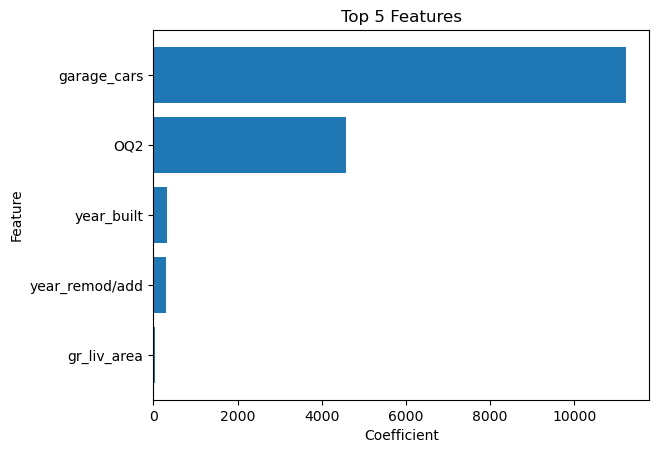

In [103]:
feature_df4 = pd.DataFrame(list(zip(X4.columns, lr_model4.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df4.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df4.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df4.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

Did r2 improve?

- r2 with all good features: 0.83
- r2 with good features and quadratic: 0.84

Yes!

Did RMSE improve?
- RMSE with all good features: 34,243.91 (train), 34,315.45 (val)
- RMSE with good features and quadratic: 34,055.26 (train), 33,322.22 (val)

Yes!

Export df with quadratic factor

In [104]:
df.to_csv('data/AmesHousingCleanedQuadratic.csv', index=False)

# Update model comparison

In [105]:
# Load the existing model comparison CSV
model_comparison_df = pd.read_csv('model_comparison.csv')
model_comparison_df

,Model,R2,Train_MAE,Train_RMSE,Val_MAE,Val_RMSE
0,LR_single_feat,0.658290,33366.620987,47588.821126,34331.889385,49010.433084
1,LR_all_feat,0.812914,23604.571316,36245.825551,23472.656831,36264.409574
2,LR_top_20_feat,0.832483,21663.030622,34243.914882,21693.955732,34315.454551


In [106]:

# Create a new row with the stats for this model
new_row = pd.DataFrame([{
    'Model': 'LR_Quadratic',
    'R2': lr_model4.score(X_test4, y_test4),
    'Train_MAE': train_mae4,
    'Val_MAE': mae4,
    'Train_RMSE': train_rmse4,
    'Val_RMSE': rmse4
}])

# Append the new row to the dataframe
model_comparison_df = pd.concat([model_comparison_df, new_row], ignore_index=True).drop_duplicates(subset=['Model'])
model_comparison_df

# Save the updated dataframe back to the CSV
model_comparison_df.to_csv('model_comparison.csv', index=False)